In [ ]:
"""
This script conducts an error analysis based on the class-specific semantic composition of each dataset,
namely ('trainval.csv', 'augmented_trainval.csv', 'augmented_trainval_quant.csv', 'augmented_trainval_quant_fs.csv', 
'augmented_trainval_quant_chat.csv').

The primary tasks include:

1. Extracting top words and their frequencies for each class in the dataset.
2. Analyzing and visualizing the top words through word clouds for each class.
3. Calculating cosine similarities between the vector representations of the top words for pairs of classes.
4. Conducting a semantic similarity analysis within classes, calculating average cosine similarities between 
   document vectors.


"""
#The script outputs analysis results and visualizations but does not modify the original datasets.

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from itertools import combinations
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import spacy
from sklearn.metrics.pairwise import cosine_similarity
from typing import Dict, Counter
    
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

nlp = spacy.load("en_core_web_md")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/chiara.manna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/chiara.manna/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/chiara.manna/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Loading datasets

In [2]:
df_trainval = pd.read_csv('data/trainval.csv', index_col= 0)

augmented_trainval = pd.read_csv('data/augmented_trainval.csv', index_col=0)
df_aug_trainval = pd.concat([augmented_trainval, df_trainval[['text', 'snapshot_id', 'label']]], ignore_index=True)

augmented_trainval_quant = pd.read_csv('data/augmented_trainval_quant.csv', index_col=0)
df_aug_trainval_quant = pd.concat([augmented_trainval_quant, df_trainval[['text', 'snapshot_id', 'label']]], ignore_index=True)

augmented_trainval_quant_fs = pd.read_csv('data/augmented_trainval_quant_fs.csv', index_col=0)
df_aug_trainval_quant_fs = pd.concat([augmented_trainval_quant_fs, df_trainval[['text', 'snapshot_id', 'label']]], ignore_index=True)

augmented_trainval_quant_chat = pd.read_csv('data/augmented_trainval_quant_chat.csv', index_col=0)
df_aug_trainval_quant_chat = pd.concat([augmented_trainval_quant_chat, df_trainval[['text', 'snapshot_id', 'label']]], ignore_index=True)

Error Analysis: Semantic Similarity Across Classes

Top 20 words for 'Cybercrime':
{'btc': 6934, 'bitcoin': 3661, 'account': 2655, 'hacking': 2489, 'hack': 2230, 'whatsapp': 1879, 'buy': 1692, 'hacker': 1639, 'service': 1575, 'paypal': 1550, 'un': 1208, 'reply': 1170, 'wallet': 1117, 'phone': 1084, 'email': 897, 'services': 894, 'get': 845, 'free': 841, 'u': 829, 'hire': 776}

Top 20 words for 'Drugs and Narcotics Trade':
{'weed': 10699, 'pot': 9654, 'cocaine': 4501, 'cannabis': 3609, 'viagra': 3443, 'smoke': 2297, 'lsd': 2267, 'amt': 2168, 'buy': 2017, 'marijuana': 2013, 'cialis': 1744, 'online': 1592, 'ecstasy': 1415, 'add': 1216, 'smoking': 1139, 'heroin': 1113, 'dmt': 1020, 'plant': 1004, 'cart': 964, 'meth': 903}

Top 20 words for 'Financial Crime':
{'card': 11265, 'buy': 5233, 'money': 3297, 'transfer': 3216, 'cards': 3061, 'bitcoin': 2834, 'paypal': 2727, 'credit': 2519, 'btc': 2451, 'get': 2288, 'union': 2260, 'cvv': 2224, 'western': 2218, 'account': 2147, 'order': 2135, 'payment': 2060, 'balance': 1949, 'gift': 1922, 'shop': 19

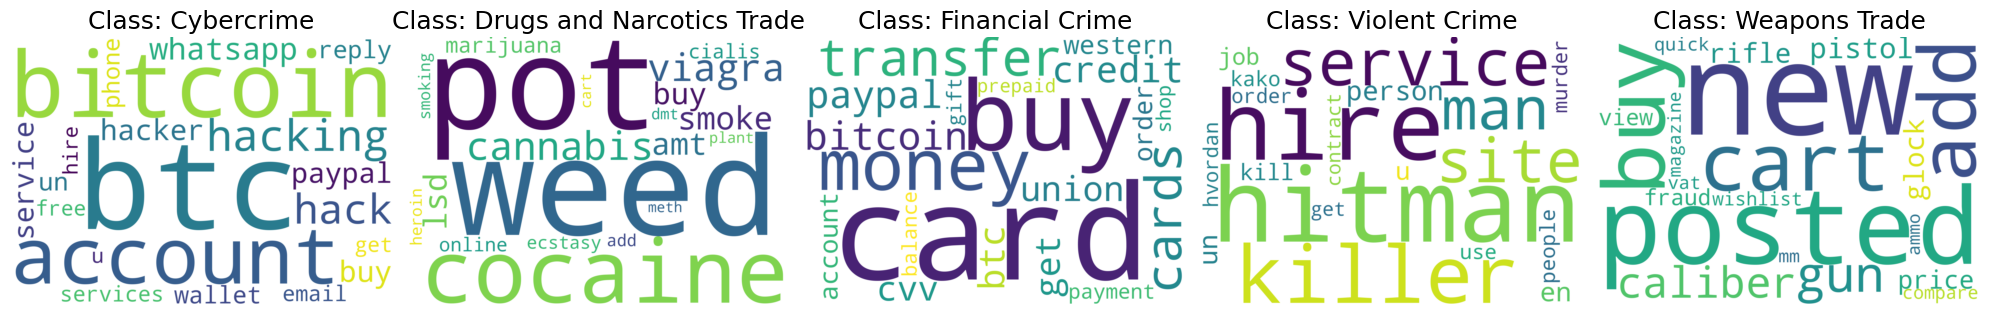


Cosine Similarities:
'Cybercrime' and 'Drugs and Narcotics Trade' have a cosine similarity of 0.50
'Cybercrime' and 'Financial Crime' have a cosine similarity of 0.79
'Cybercrime' and 'Violent Crime' have a cosine similarity of 0.70
'Cybercrime' and 'Weapons Trade' have a cosine similarity of 0.54
'Drugs and Narcotics Trade' and 'Financial Crime' have a cosine similarity of 0.51
'Drugs and Narcotics Trade' and 'Violent Crime' have a cosine similarity of 0.46
'Drugs and Narcotics Trade' and 'Weapons Trade' have a cosine similarity of 0.52
'Financial Crime' and 'Violent Crime' have a cosine similarity of 0.55
'Financial Crime' and 'Weapons Trade' have a cosine similarity of 0.60
'Violent Crime' and 'Weapons Trade' have a cosine similarity of 0.42

Top word intersections between 'Cybercrime' and 'Drugs and Narcotics Trade':
{'buy'}

Top word intersections between 'Cybercrime' and 'Financial Crime':
{'bitcoin', 'paypal', 'btc', 'account', 'get', 'buy'}

Top word intersections between 'Cyb

In [3]:
def remove_stopwords_and_lemmatize(text: str) -> str:

    """Remove stopwords and lemmatize the given text."""

    text = re.sub(r'[^\w\s]', '', text)
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    return ' '.join(lemmatized_words)

def top_word(df: pd.DataFrame, top_n: int) -> Dict[str, Dict[str, int]]:
    """
    Extract top words and their frequencies for each class.

    Parameters:
    - df: DataFrame containing 'text' and 'label' columns.
    - top_n: Number of top words to consider.

    Returns:
    A dictionary with 'top_words', in the form: 
    {'top_words': {
        'class1': {'word1': frequency1, 'word2': frequency2, ..., 'word20': frequency20},
        'class2': {'word1': frequency1, 'word2': frequency2, ..., 'word20': frequency20},
        ...} } 
    """
    class_word_freq: Dict[str, Counter[str]] = {}
    top_words: Dict[str, Dict[str, int]] = {}

    df_copy = df.copy()
    df_copy['text'] = df_copy['text'].apply(remove_stopwords_and_lemmatize)

    for class_name, texts in df_copy.groupby('label')['text']:
        words = ' '.join(texts).lower().split()
        class_word_freq[class_name] = Counter(words)

        top_words[class_name] = dict(class_word_freq[class_name].most_common(top_n))

    return {'top_words': top_words}

def analyze_and_plot(df: pd.DataFrame, top_n: int) -> Dict:
    """
    Analyze and plot results based on top words and semantic similarity.

    Parameters:
    - df: DataFrame containing 'text' and 'label' columns.
    - top_n: Number of top words to consider.

    Returns:
    A dictionary containing analysis results with the following structure:

    {'top_words': {
            'class1': {'word1': frequency1, 'word2': frequency2, ..., 'word20': frequency20},
            'class2': {'word1': frequency1, 'word2': frequency2, ..., 'word20': frequency20},
            ...},
    'class_similarities': {
            ('class1', 'class2'): similarity_value,
            ('class1', 'class3'): similarity_value,
            ...},
    }

    The function prints:
    - Top words for each class.
    - Wordclouds for each class.
    - Cosine similarities between classes based on top word vectors.
    - Top word intersections between pairs of classes.
    """

    results = top_word(df, top_n)

    top_words_lists = []

    for class_name, top_words in results['top_words'].items():
        print(f"Top {top_n} words for '{class_name}':")
        print(top_words)
        print()

        top_words_lists.append(list(top_words.keys()))

    #Wordclouds
    num_classes = len(results['top_words'])
    _, axes = plt.subplots(1, num_classes, figsize=(20, 5))

    for i, (class_name, top_words) in enumerate(results['top_words'].items()):
        common_words_freq = {word: freq for word, freq in top_words.items()}
        wordcloud = WordCloud(width=2000, height=1400, background_color='white',
                          colormap= 'viridis', prefer_horizontal=0.8).generate_from_frequencies(common_words_freq)
        axes[i].imshow(wordcloud, interpolation='bilinear')
        axes[i].axis('off')
        axes[i].set_title(f'Class: {class_name}', fontsize = 18)

    plt.tight_layout()
    plt.show()

    #Vectors-based pairwise semantic similarity
    top_words_vectors = {class_name: [nlp(word).vector for word in top_words.keys()] 
                        for class_name, top_words in results['top_words'].items()}

    semantic_similarities = {}
    class_combinations = combinations(results['top_words'].keys(), 2)

    for class1, class2 in class_combinations:
        vectors_class1 = top_words_vectors[class1]
        vectors_class2 = top_words_vectors[class2]
    
        mean_vector_class1 = sum(vectors_class1) / len(vectors_class1)
        mean_vector_class2 = sum(vectors_class2) / len(vectors_class2)
    
        similarity = cosine_similarity([mean_vector_class1], [mean_vector_class2])[0][0]
    
        semantic_similarities[(class1, class2)] = similarity

    print("\nCosine Similarities:")
    for (class1, class2), similarity in semantic_similarities.items():
        print(f"'{class1}' and '{class2}' have a cosine similarity of {similarity:.2f}")

    pairwise_intersections = {}
    common_words_list = []

    class_combinations = combinations(results['top_words'].keys(), 2)

    for class1, class2 in class_combinations:
        top_words_class1 = set(results['top_words'][class1].keys())
        top_words_class2 = set(results['top_words'][class2].keys())
        intersection = top_words_class1.intersection(top_words_class2)
        pairwise_intersections[(class1, class2)] = intersection

        # Intersection of top words for each pair of classes
        print(f"\nTop word intersections between '{class1}' and '{class2}':")
        print(intersection)
        common_words_list.extend(intersection)

    return results


top_n = 20  # top n words to consider
results = analyze_and_plot(df_trainval, top_n)

Top 20 words for 'Cybercrime':
{'btc': 6943, 'bitcoin': 3700, 'account': 2697, 'hacking': 2525, 'hack': 2272, 'whatsapp': 1889, 'buy': 1705, 'hacker': 1675, 'service': 1606, 'paypal': 1561, 'un': 1208, 'reply': 1171, 'wallet': 1136, 'phone': 1102, 'email': 944, 'services': 896, 'get': 877, 'u': 852, 'free': 848, 'data': 802}

Top 20 words for 'Drugs and Narcotics Trade':
{'weed': 10727, 'pot': 9662, 'cocaine': 4597, 'cannabis': 3638, 'viagra': 3443, 'smoke': 2297, 'lsd': 2292, 'amt': 2168, 'buy': 2094, 'marijuana': 2056, 'cialis': 1744, 'online': 1678, 'ecstasy': 1429, 'add': 1222, 'heroin': 1146, 'smoking': 1145, 'dmt': 1028, 'plant': 1012, 'cart': 972, 'order': 936}

Top 20 words for 'Financial Crime':
{'card': 11265, 'buy': 5233, 'money': 3297, 'transfer': 3216, 'cards': 3061, 'bitcoin': 2834, 'paypal': 2727, 'credit': 2519, 'btc': 2451, 'get': 2288, 'union': 2260, 'cvv': 2224, 'western': 2218, 'account': 2147, 'order': 2135, 'payment': 2060, 'balance': 1949, 'gift': 1922, 'shop': 1

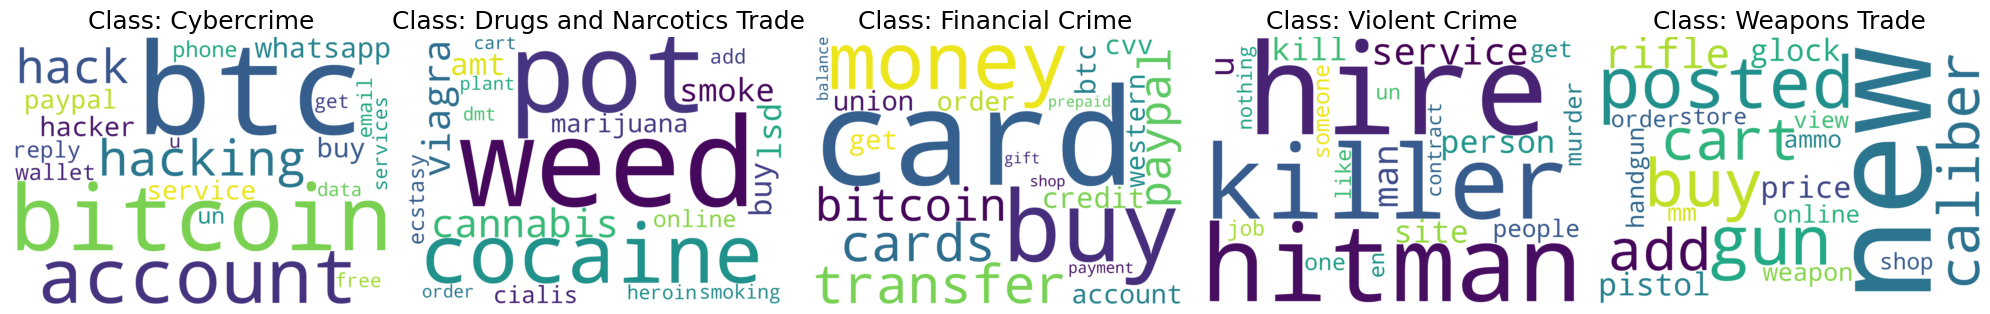


Cosine Similarities:
'Cybercrime' and 'Drugs and Narcotics Trade' have a cosine similarity of 0.53
'Cybercrime' and 'Financial Crime' have a cosine similarity of 0.80
'Cybercrime' and 'Violent Crime' have a cosine similarity of 0.63
'Cybercrime' and 'Weapons Trade' have a cosine similarity of 0.55
'Drugs and Narcotics Trade' and 'Financial Crime' have a cosine similarity of 0.57
'Drugs and Narcotics Trade' and 'Violent Crime' have a cosine similarity of 0.48
'Drugs and Narcotics Trade' and 'Weapons Trade' have a cosine similarity of 0.58
'Financial Crime' and 'Violent Crime' have a cosine similarity of 0.53
'Financial Crime' and 'Weapons Trade' have a cosine similarity of 0.63
'Violent Crime' and 'Weapons Trade' have a cosine similarity of 0.43

Top word intersections between 'Cybercrime' and 'Drugs and Narcotics Trade':
{'buy'}

Top word intersections between 'Cybercrime' and 'Financial Crime':
{'bitcoin', 'paypal', 'btc', 'account', 'get', 'buy'}

Top word intersections between 'Cyb

In [4]:
results = analyze_and_plot(df_aug_trainval, top_n)

Top 20 words for 'Cybercrime':
{'btc': 6974, 'bitcoin': 3689, 'account': 2706, 'hacking': 2566, 'hack': 2360, 'whatsapp': 1910, 'hacker': 1738, 'buy': 1709, 'service': 1622, 'paypal': 1553, 'un': 1208, 'reply': 1172, 'wallet': 1137, 'phone': 1111, 'email': 961, 'services': 911, 'get': 876, 'free': 858, 'u': 853, 'hire': 822}

Top 20 words for 'Drugs and Narcotics Trade':
{'weed': 11231, 'pot': 9677, 'cocaine': 4608, 'cannabis': 3650, 'viagra': 3445, 'smoke': 2314, 'lsd': 2299, 'amt': 2169, 'buy': 2101, 'marijuana': 2068, 'cialis': 1749, 'online': 1677, 'ecstasy': 1430, 'add': 1271, 'smoking': 1149, 'heroin': 1143, 'dmt': 1030, 'cart': 1024, 'plant': 1016, 'order': 939}

Top 20 words for 'Financial Crime':
{'card': 11265, 'buy': 5233, 'money': 3297, 'transfer': 3216, 'cards': 3061, 'bitcoin': 2834, 'paypal': 2727, 'credit': 2519, 'btc': 2451, 'get': 2288, 'union': 2260, 'cvv': 2224, 'western': 2218, 'account': 2147, 'order': 2135, 'payment': 2060, 'balance': 1949, 'gift': 1922, 'shop': 

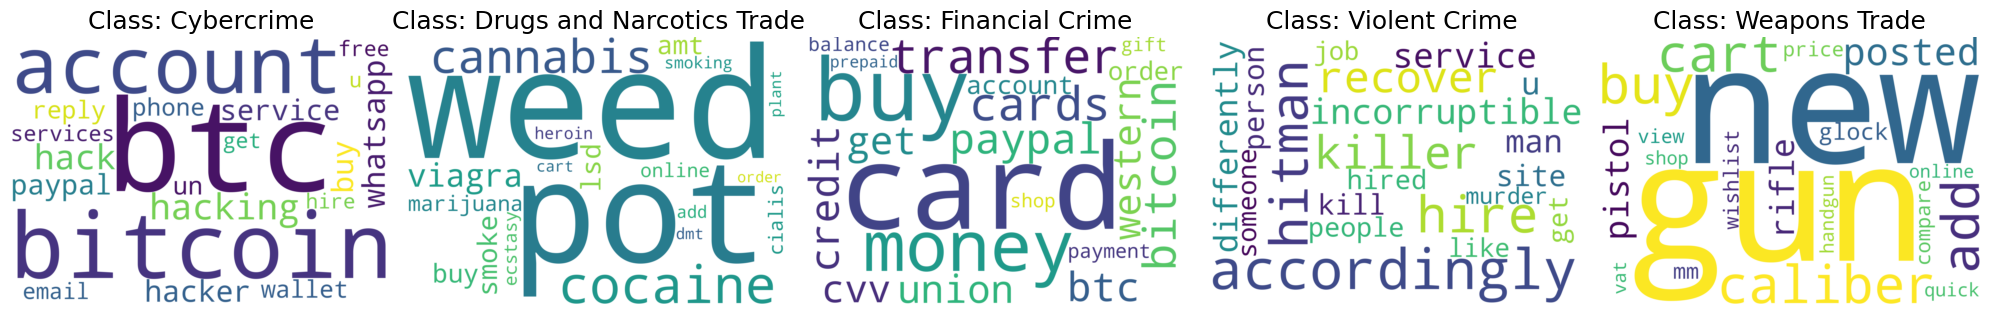


Cosine Similarities:
'Cybercrime' and 'Drugs and Narcotics Trade' have a cosine similarity of 0.54
'Cybercrime' and 'Financial Crime' have a cosine similarity of 0.79
'Cybercrime' and 'Violent Crime' have a cosine similarity of 0.64
'Cybercrime' and 'Weapons Trade' have a cosine similarity of 0.57
'Drugs and Narcotics Trade' and 'Financial Crime' have a cosine similarity of 0.57
'Drugs and Narcotics Trade' and 'Violent Crime' have a cosine similarity of 0.49
'Drugs and Narcotics Trade' and 'Weapons Trade' have a cosine similarity of 0.59
'Financial Crime' and 'Violent Crime' have a cosine similarity of 0.58
'Financial Crime' and 'Weapons Trade' have a cosine similarity of 0.62
'Violent Crime' and 'Weapons Trade' have a cosine similarity of 0.45

Top word intersections between 'Cybercrime' and 'Drugs and Narcotics Trade':
{'buy'}

Top word intersections between 'Cybercrime' and 'Financial Crime':
{'bitcoin', 'paypal', 'btc', 'account', 'get', 'buy'}

Top word intersections between 'Cyb

In [5]:
results = analyze_and_plot(df_aug_trainval_quant, top_n)

Top 20 words for 'Cybercrime':
{'btc': 7080, 'bitcoin': 3735, 'account': 2708, 'hacking': 2582, 'hack': 2276, 'whatsapp': 1894, 'buy': 1768, 'hacker': 1710, 'service': 1662, 'paypal': 1553, 'un': 1208, 'reply': 1170, 'wallet': 1126, 'phone': 1117, 'email': 931, 'services': 905, 'get': 866, 'u': 861, 'free': 859, 'hire': 810}

Top 20 words for 'Drugs and Narcotics Trade':
{'weed': 10760, 'pot': 9728, 'cocaine': 4575, 'cannabis': 3707, 'viagra': 3459, 'lsd': 2333, 'smoke': 2304, 'amt': 2174, 'buy': 2088, 'marijuana': 2033, 'cialis': 1827, 'online': 1802, 'ecstasy': 1435, 'add': 1244, 'smoking': 1143, 'heroin': 1141, 'dmt': 1045, 'plant': 1020, 'order': 1014, 'cart': 1000}

Top 20 words for 'Financial Crime':
{'card': 11265, 'buy': 5233, 'money': 3297, 'transfer': 3216, 'cards': 3061, 'bitcoin': 2834, 'paypal': 2727, 'credit': 2519, 'btc': 2451, 'get': 2288, 'union': 2260, 'cvv': 2224, 'western': 2218, 'account': 2147, 'order': 2135, 'payment': 2060, 'balance': 1949, 'gift': 1922, 'shop':

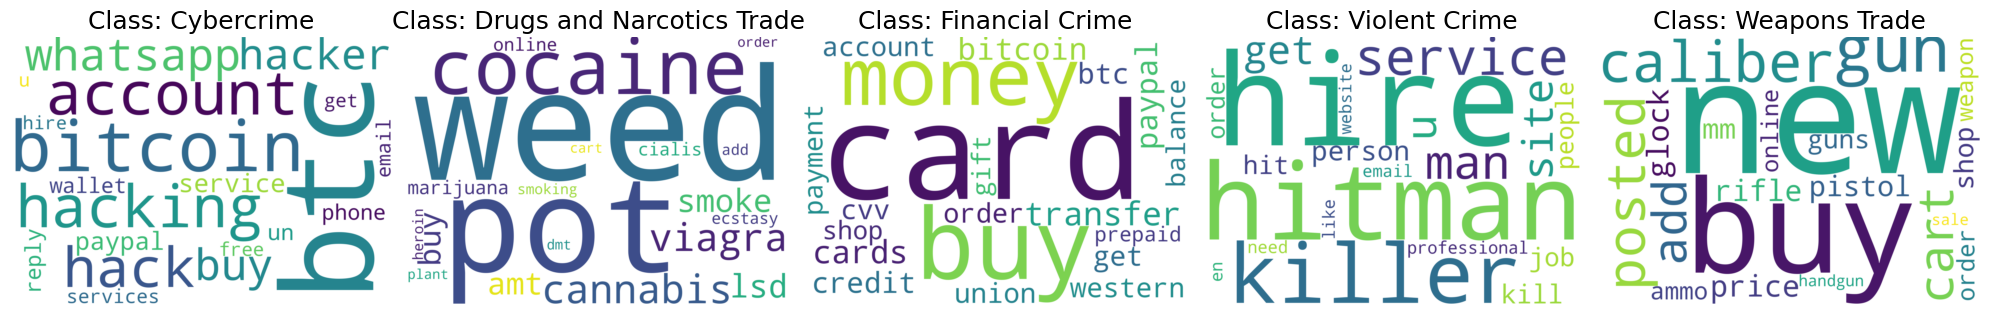


Cosine Similarities:
'Cybercrime' and 'Drugs and Narcotics Trade' have a cosine similarity of 0.54
'Cybercrime' and 'Financial Crime' have a cosine similarity of 0.79
'Cybercrime' and 'Violent Crime' have a cosine similarity of 0.76
'Cybercrime' and 'Weapons Trade' have a cosine similarity of 0.51
'Drugs and Narcotics Trade' and 'Financial Crime' have a cosine similarity of 0.57
'Drugs and Narcotics Trade' and 'Violent Crime' have a cosine similarity of 0.55
'Drugs and Narcotics Trade' and 'Weapons Trade' have a cosine similarity of 0.56
'Financial Crime' and 'Violent Crime' have a cosine similarity of 0.63
'Financial Crime' and 'Weapons Trade' have a cosine similarity of 0.58
'Violent Crime' and 'Weapons Trade' have a cosine similarity of 0.48

Top word intersections between 'Cybercrime' and 'Drugs and Narcotics Trade':
{'buy'}

Top word intersections between 'Cybercrime' and 'Financial Crime':
{'bitcoin', 'paypal', 'btc', 'account', 'get', 'buy'}

Top word intersections between 'Cyb

In [6]:
results = analyze_and_plot(df_aug_trainval_quant_fs, top_n)

Top 20 words for 'Cybercrime':
{'btc': 6952, 'bitcoin': 3704, 'account': 2682, 'hacking': 2516, 'hack': 2234, 'whatsapp': 1879, 'buy': 1695, 'hacker': 1653, 'service': 1604, 'paypal': 1554, 'un': 1209, 'reply': 1170, 'wallet': 1124, 'phone': 1085, 'email': 930, 'services': 907, 'free': 869, 'get': 850, 'u': 835, 'data': 789}

Top 20 words for 'Drugs and Narcotics Trade':
{'weed': 10724, 'pot': 9664, 'cocaine': 4570, 'cannabis': 3663, 'viagra': 3444, 'smoke': 2303, 'lsd': 2289, 'amt': 2171, 'buy': 2058, 'marijuana': 2048, 'cialis': 1748, 'online': 1697, 'ecstasy': 1424, 'add': 1220, 'heroin': 1147, 'smoking': 1141, 'dmt': 1026, 'plant': 1008, 'cart': 967, 'meth': 915}

Top 20 words for 'Financial Crime':
{'card': 11265, 'buy': 5233, 'money': 3297, 'transfer': 3216, 'cards': 3061, 'bitcoin': 2834, 'paypal': 2727, 'credit': 2519, 'btc': 2451, 'get': 2288, 'union': 2260, 'cvv': 2224, 'western': 2218, 'account': 2147, 'order': 2135, 'payment': 2060, 'balance': 1949, 'gift': 1922, 'shop': 19

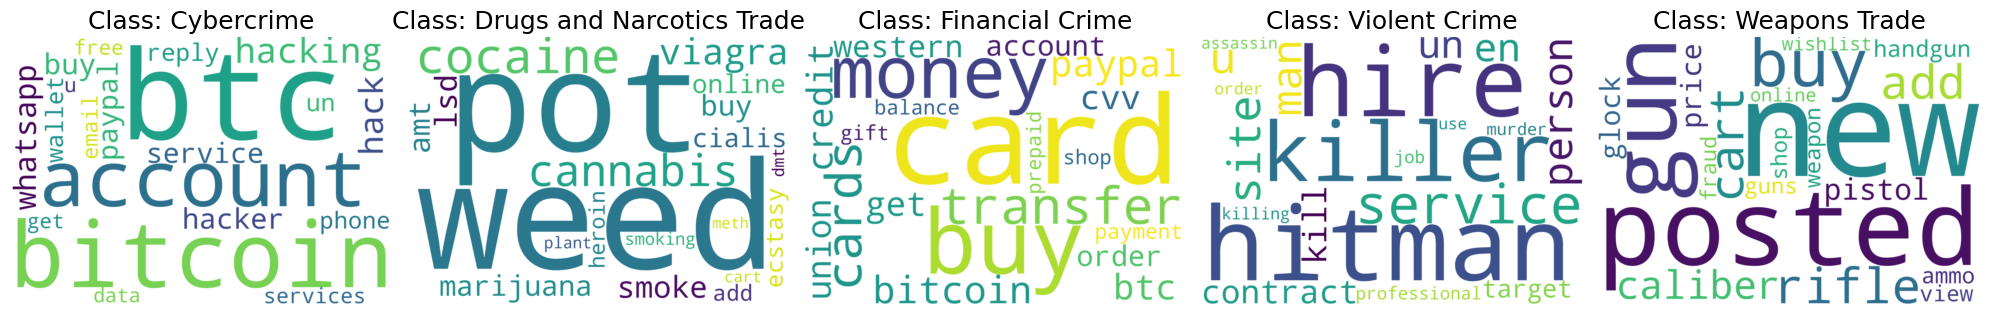


Cosine Similarities:
'Cybercrime' and 'Drugs and Narcotics Trade' have a cosine similarity of 0.49
'Cybercrime' and 'Financial Crime' have a cosine similarity of 0.80
'Cybercrime' and 'Violent Crime' have a cosine similarity of 0.63
'Cybercrime' and 'Weapons Trade' have a cosine similarity of 0.61
'Drugs and Narcotics Trade' and 'Financial Crime' have a cosine similarity of 0.51
'Drugs and Narcotics Trade' and 'Violent Crime' have a cosine similarity of 0.43
'Drugs and Narcotics Trade' and 'Weapons Trade' have a cosine similarity of 0.57
'Financial Crime' and 'Violent Crime' have a cosine similarity of 0.54
'Financial Crime' and 'Weapons Trade' have a cosine similarity of 0.67
'Violent Crime' and 'Weapons Trade' have a cosine similarity of 0.53

Top word intersections between 'Cybercrime' and 'Drugs and Narcotics Trade':
{'buy'}

Top word intersections between 'Cybercrime' and 'Financial Crime':
{'bitcoin', 'paypal', 'btc', 'account', 'get', 'buy'}

Top word intersections between 'Cyb

In [7]:
results = analyze_and_plot(df_aug_trainval_quant_chat, top_n)

Error Analysis: Semantic Similarity Within Classes

In [8]:
def calculate_avg_cosine_similarity(df: pd.DataFrame, nlp: spacy.lang.en.English) -> Dict[str, float]:
    """
    Calculate the average cosine similarity between document vectors for different classes.

    Parameters:
    - df: DataFrame containing 'text' and 'label' columns.
    - nlp: spaCy language model.

    Returns:
    A dictionary where keys are class labels and values are average cosine similarities.
    """
    class_vectors = defaultdict(list)

    for _, row in df.iterrows():
        vector = np.mean([word.vector for word in nlp(row["text"])], axis=0)
        class_vectors[row["label"]].append(vector)

    avg_similarities = {}

    for class_label, vectors in class_vectors.items():
        vector_combinations = list(combinations(vectors, 2))
        similarities = [cosine_similarity([vec1], [vec2])[0, 0] for vec1, vec2 in vector_combinations]
        avg_similarity = np.mean(similarities) if similarities else 0.0
        avg_similarities[class_label] = avg_similarity

    return avg_similarities


In [ ]:
result_trainval = calculate_avg_cosine_similarity(df_trainval, nlp)
print("Average Similarities for df_trainval:")
print(result_trainval)

Average Similarities for df_trainval:
{'Drugs and Narcotics Trade': 0.7098751, 'Cybercrime': 0.7674065, 'Financial Crime': 0.7856141, 'Violent Crime': 0.88882947, 'Weapons Trade': 0.7505586}


In [ ]:
result_aug_trainval = calculate_avg_cosine_similarity(df_aug_trainval, nlp)
print("Average Similarities for df_aug_trainval:")
print(result_aug_trainval)

Average Similarities for df_aug_trainval:
{'Cybercrime': 0.73888713, 'Weapons Trade': 0.6116347, 'Drugs and Narcotics Trade': 0.6458947, 'Violent Crime': 0.5890022, 'Financial Crime': 0.7856141}


In [ ]:
result_aug_trainval_quant = calculate_avg_cosine_similarity(df_aug_trainval_quant, nlp)
print("Average Similarities for df_aug_trainval_quant:")
print(result_aug_trainval_quant)

Average Similarities for df_aug_trainval_quant:
{'Cybercrime': 0.7289409, 'Weapons Trade': 0.62461585, 'Drugs and Narcotics Trade': 0.6366381, 'Violent Crime': 0.62095153, 'Financial Crime': 0.7856141}


In [ ]:
result_aug_trainval_quant_fs = calculate_avg_cosine_similarity(df_aug_trainval_quant_fs, nlp)
print("Average Similarities for df_aug_trainval_fs:")
print(result_aug_trainval_quant_fs)

Average Similarities for df_aug_trainval_fs:
{'Cybercrime': 0.7446079, 'Weapons Trade': 0.65252954, 'Drugs and Narcotics Trade': 0.6872461, 'Violent Crime': 0.6398132, 'Financial Crime': 0.7856141}


In [ ]:
result_aug_trainval_quant_chat = calculate_avg_cosine_similarity(df_aug_trainval_quant_chat, nlp)
print("Average Similarities for df_aug_trainval_chat:")
print(result_aug_trainval_quant_chat)

Average Similarities for df_aug_trainval_chat:
{'Cybercrime': 0.7670907, 'Weapons Trade': 0.7066341, 'Drugs and Narcotics Trade': 0.6825528, 'Violent Crime': 0.76424843, 'Financial Crime': 0.7856141}
